In [45]:
!pip install mnist

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical

import mnist

In [47]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [48]:
print(train_images.shape)
print(test_images.shape)
train_images[0]

(60000, 28, 28)
(10000, 28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

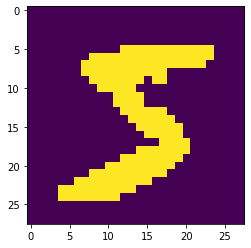

In [49]:
test_images = np.where(test_images > 0, 255, 0)
train_images = np.where(train_images > 0, 255, 0)

plt.imshow(train_images[0])
plt.show()

In [50]:
# Normalizing the images
train_images = train_images/255.0
test_images = test_images/255.0

train_images[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1

In [51]:
# Changing the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels.shape)
train_labels[0]

(60000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [52]:
# Reshaping the images data
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

train_images.shape

(60000, 28, 28, 1)

In [53]:
# Defining the model
model = Sequential()

model.add(Conv2D(64, (3,3), activation= 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(64, (3,3), activation= 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax"))

In [54]:
# Compiling the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [55]:
model.fit(
    train_images, 
    train_labels,
    batch_size = 32,
    epochs = 5    
    )

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1011 - accuracy: 0.9690
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0497 - accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0378 - accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0316 - accuracy: 0.9899
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0264 - accuracy: 0.9916


In [56]:
model.evaluate(
    test_images,
    test_labels
    )

313/313 [==============================] - 2s 6ms/step - loss: 0.0431 - accuracy: 0.9876


[0.043072979897260666, 0.9876000285148621]

In [57]:
# Attempting Augmentation
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False
)

In [58]:
train_data = data_generator.flow(train_images, train_labels)
test_data = data_generator.flow(test_images, test_labels)

In [59]:
hist = model.fit_generator(
    train_data, 
    epochs = 10, 
)

Epoch 1/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0775 - accuracy: 0.9765
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0544 - accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0456 - accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0450 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0397 - accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0363 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0357 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0333 - accuracy: 0.9895
Epoch 9/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0296 - accuracy: 0.9909
Epoch 10/10
1875/1875 [==============================] - 40s 21m

In [60]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, show_shapes = True, show_layer_names = True)

In [61]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

labels_predict = model.predict(test_images)

labels_predict = np.argmax(labels_predict, 1)
test_labels = np.argmax(test_labels, 1)

confusion = confusion_matrix(test_labels, labels_predict)

confusion

array([[ 979,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   1, 1128,    1,    1,    0,    0,    1,    1,    1,    1],
       [   2,    0, 1026,    2,    0,    0,    0,    2,    0,    0],
       [   0,    0,    0, 1008,    0,    1,    0,    0,    1,    0],
       [   0,    0,    1,    0,  971,    0,    0,    0,    1,    9],
       [   2,    0,    0,    6,    0,  882,    2,    0,    0,    0],
       [   5,    2,    1,    0,    1,    1,  947,    0,    1,    0],
       [   0,    3,    3,    1,    3,    0,    0, 1014,    0,    4],
       [   6,    0,    0,    2,    0,    1,    0,    0,  964,    1],
       [   0,    1,    0,    0,    4,    1,    0,    1,    2, 1000]])

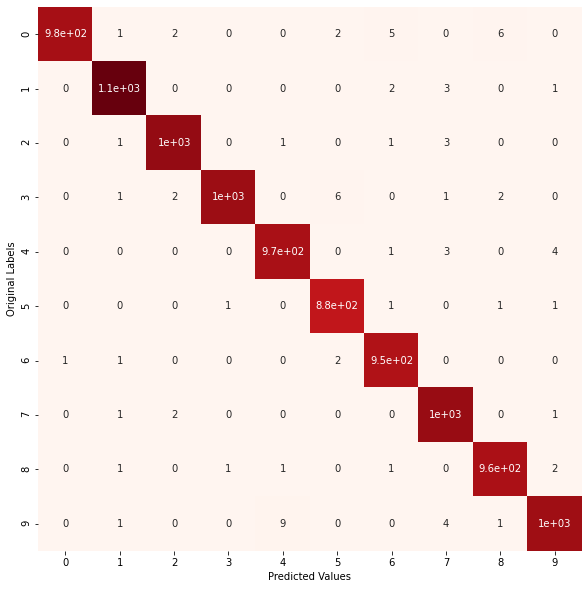

In [66]:
import seaborn as sns

fig = plt.figure(figsize=(10, 10))
sns.heatmap(confusion.T, square = True, annot = True, cbar = False, cmap = plt.cm.Reds)
plt.xlabel("Predicted Values")
plt.ylabel("Original Labels")
plt.show()